<a href="https://colab.research.google.com/github/gackouhamady/MLSD-25-26-Courses/blob/main/01-Data-Engineering/BI/notebooks/01_Exploratory_Data_Analysis_R_PartI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (Part I/II)**

We will see how to use visualization and transformation<br/>
to explore your data in a systematic way.

The Exploratory Data Analysis process is an iterative cycle, through which you:

1.   Generate questions about data
2.   Search for answers by visualizing, transforming, and modeling
your data
3.   Use what you learn to refine your questions and/or generate
new questions

Two types of questions will always be useful for making discoveries within your data:

1.   What type of variation occurs within my variables?
2.   What type of covariation occurs between my variables?

## Visualizing distribution / variation

Every variable has its own pattern of variation, which<br/>
can reveal interesting information. The best way to understand that<br/>
pattern is to visualize the distribution of variables' values.<br/><br/>

How you visualize the distribution of a variable will depend on<br/>
whether the variable is categorical or continuous. A variable is categorical<br/>
if it can only take one of a small set of values. In R, categorical<br/>
variables are usually saved as factors or character vectors.

In [ ]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


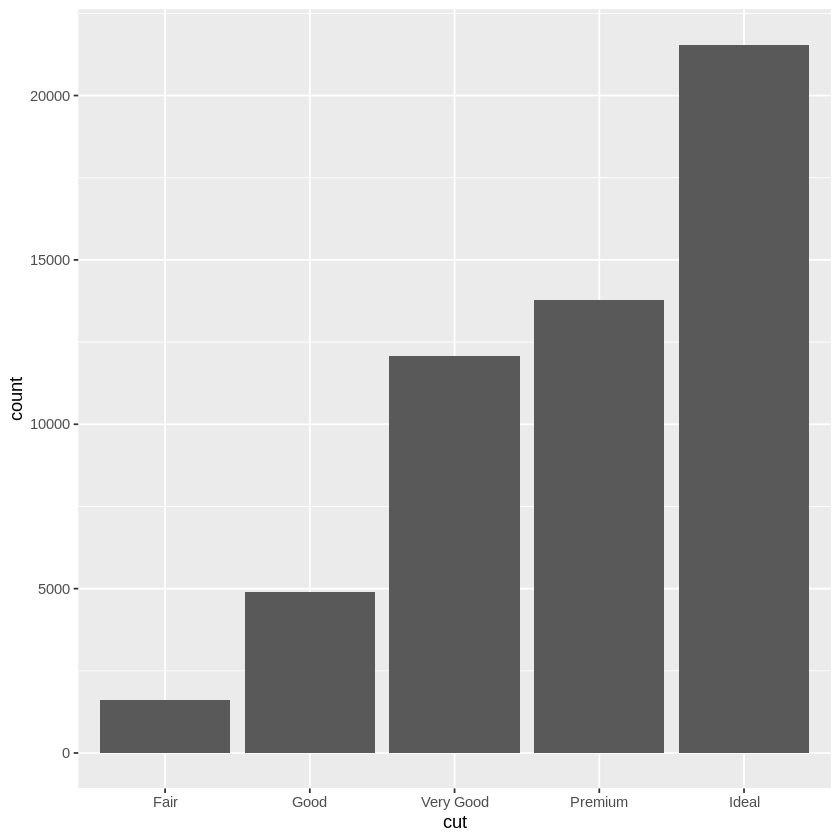

In [ ]:
# Examine the distribution of a categorical variable with a bar chart
# Heigh of a bar = how many observations occurred for a given x value
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))

In [ ]:
# Compute the counts corresponding to the above bar plot
diamonds %>%
  count(cut)

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


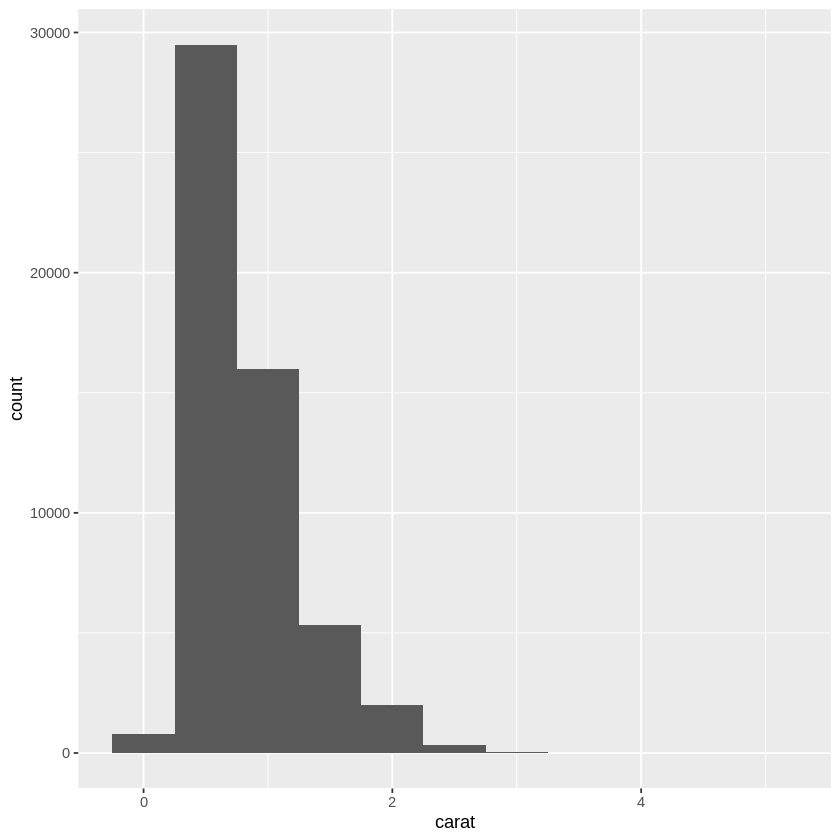

In [ ]:
# Examine a continuous variable using an histogram
# A histogram divides the x-axis into equally spaced bins and then
# uses the height of each bar to display the number of observations
# that fall in each bin.
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

# NB: 30,000 observations have a carat value between 0.25
# and 0.75, which are the left and right edges of the bar.

You can set the width of the intervals in a histogram with the bin<br/>
width argument, which is measured in the units of the x variable.<br/>
<br/>

You should always explore a variety of binwidths when working<br/>
with histograms, as different binwidths can reveal different patterns.


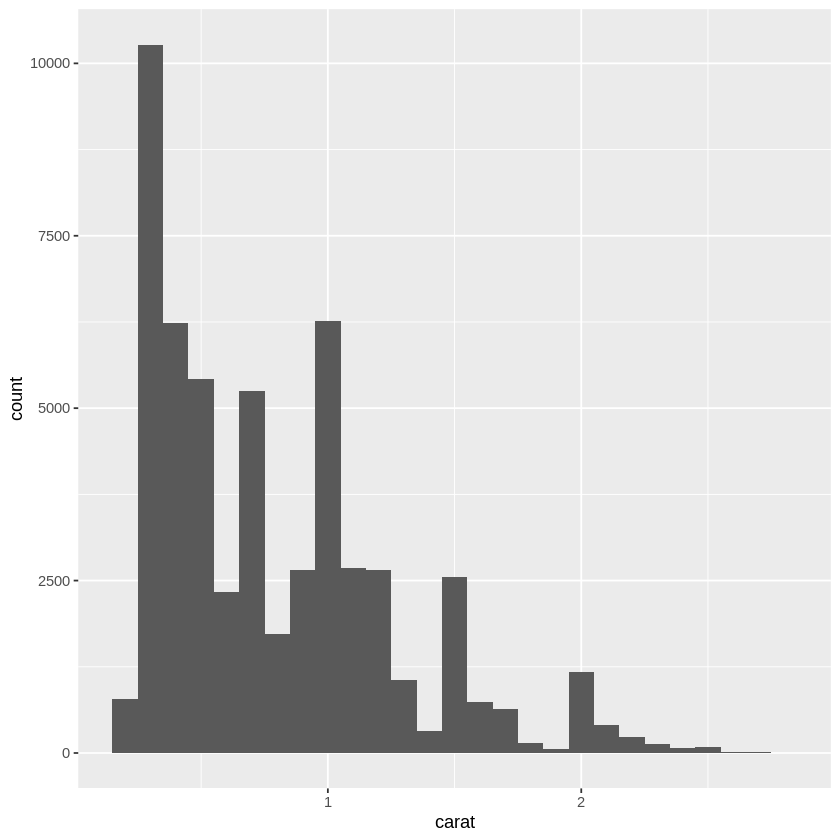

In [ ]:
# Let us consider diamonds with a size of less than three carats and
# choose a smaller binwidth
smaller <- diamonds %>%
  filter(carat < 3)

ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.1)


You can also overlay multiple histograms in the same plot using **geom_freqpoly()**. <br/>
Instead of displaying the counts with bars, it uses lines.

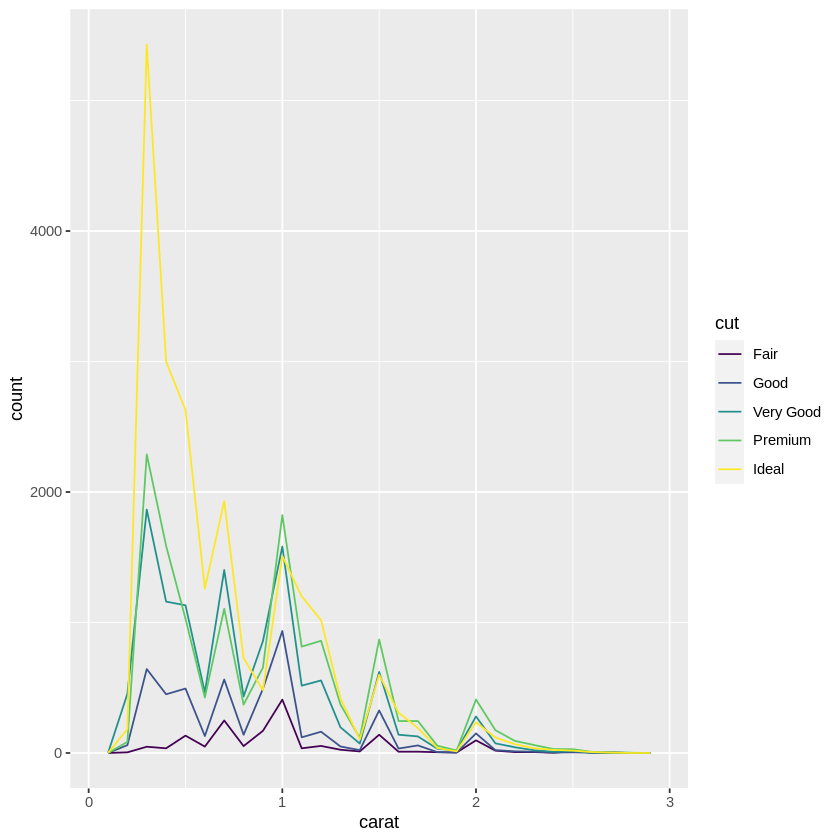

In [ ]:
ggplot(data = smaller, mapping = aes(x = carat, color = cut)) +
  geom_freqpoly(binwidth = 0.1)

With histograms, you can visualize typical values and groups.



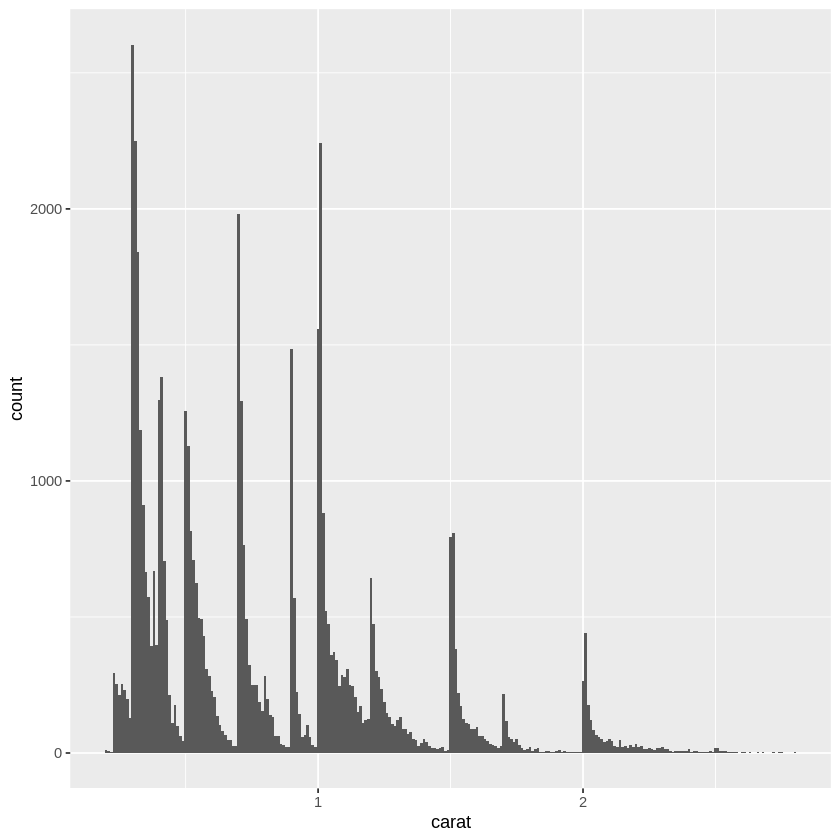

In [ ]:
ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.01)

The above plot can trigger new questions on the data, for instance:

1.   Why are there more diamonds at whole carats and common
fractions of carats?
2.   Why are there more diamonds slightly to the right of each peak
than there are slightly to the left of each peak?
3.   Why are there no diamonds bigger than 3 carats?


The following histogram shows the length (in minutes) of 272 eruptions<br/>
of the Old Faithful Geyser in Yellowstone National Park. Eruption<br/>
times appear to be clustered into two groups: there are short<br/>
eruptions (of around 2 minutes) and long eruptions (4–5 minutes),<br/>
but little in between:

In [ ]:
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


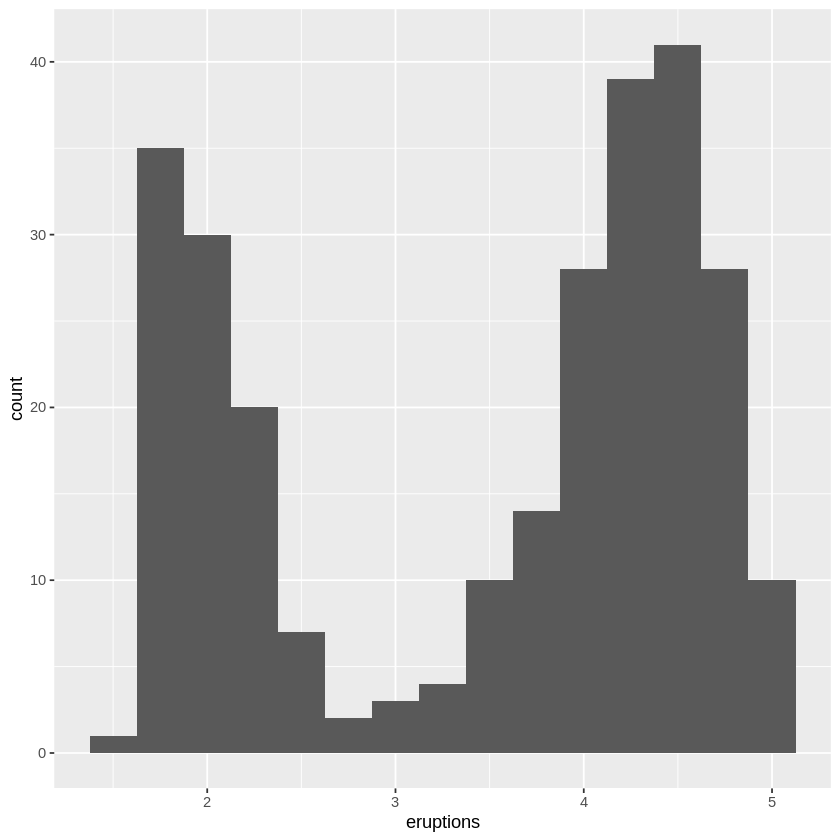

In [ ]:
ggplot(data = faithful, mapping = aes(x = eruptions)) +
  geom_histogram(binwidth = 0.25)

Visualizing your data can also help you to detect outliers.<br/>

Outliers are are observations that are unusual; data points that don’t
seem to fit the pattern. Sometimes outliers are data entry errors;<br/>
other times outliers suggest new hypothesis that are worth to be explored.

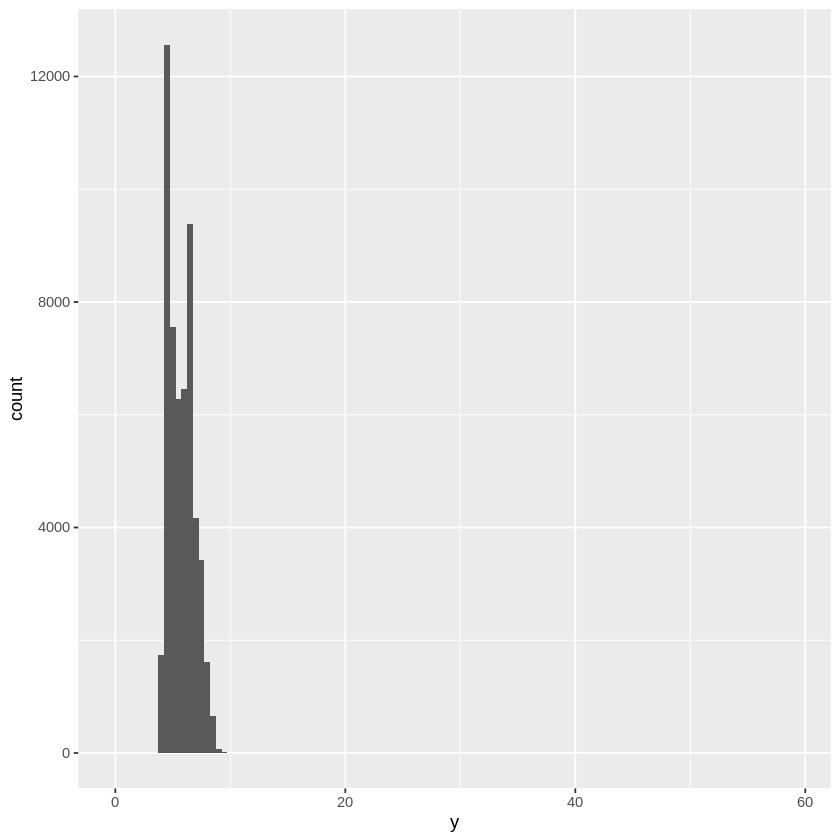

In [ ]:
ggplot(diamonds) +
  geom_histogram(mapping = aes(x = y), binwidth = 0.5)

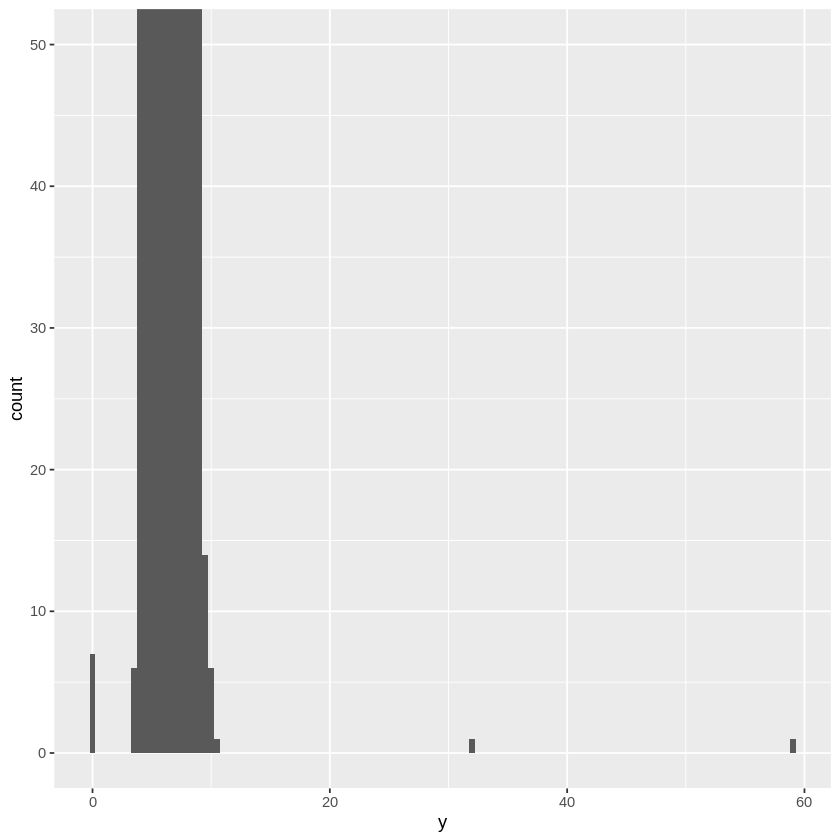

In [ ]:
# Let's zoom in
ggplot(diamonds) +
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

You can decide to replace the outliers values with NA, so that ggplot does not plot them.

In [ ]:
diamonds2 <- diamonds %>%
  mutate(y = ifelse(y < 3 | y > 20, NA, y))

Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


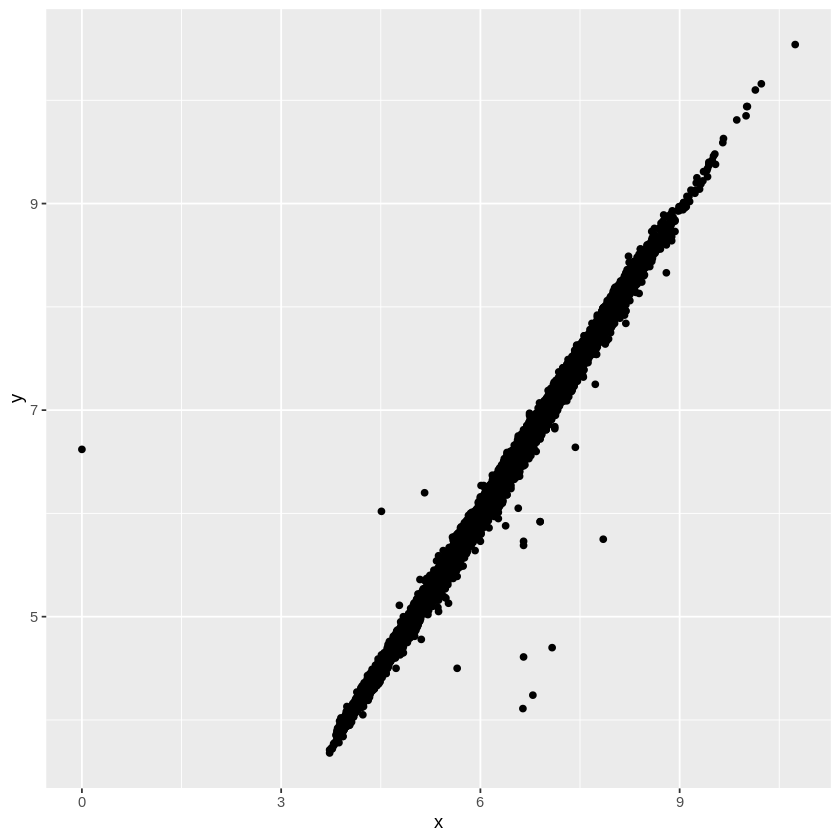

In [ ]:
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) +
  geom_point()

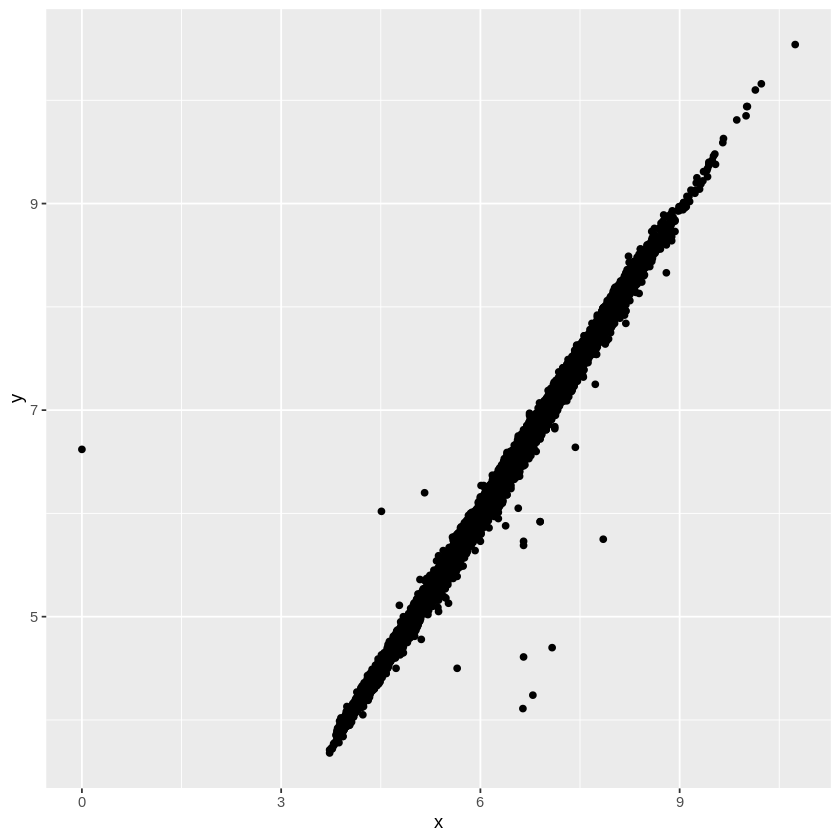

In [ ]:
# To suppress the warning
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) +
  geom_point(na.rm = TRUE)

### --- !!! --- **Exercises** --- !!! ---

Explore the distribution of each of the x, y, and z variables in<br/>
diamonds. What do you learn? Think about a diamond and how<br/>
you might decide which dimension is the length, width, and<br/>
depth.

In [ ]:
# ../..

Explore the distribution of price. Do you discover anything<br/>
unusual or surprising? (Hint: carefully think about the bin<br/>
width and make sure you try a wide range of values.)

In [ ]:
# ../..

How many diamonds are 0.99 carat? How many are 1 carat?<br/>
What do you think is the cause of the difference?

In [ ]:
# ../..

## Visualizing covariation

If variation describes the behavior within a variable, covariation<br/>
describes the behavior between variables. Covariation is the tendency<br/>
for the values of two or more variables to vary together in a<br/>
related way. The best way to spot covariation is to visualize the relationship<br/>
between two or more variables.

### A Categorical and Continuous Variable

It's common to want to explore the distribution of a continuous<br/>
variable broken down by a categorical variable, as in the previous<br/>
frequency polygon.<br/>
<br/>

The default appearance of geom_freqpoly() is not that useful for that<br/>
sort of comparison because the height is given by the count. That means<br/>  if one of the groups is much smaller than the others, it's hard to see<br/>
the differences in shape.


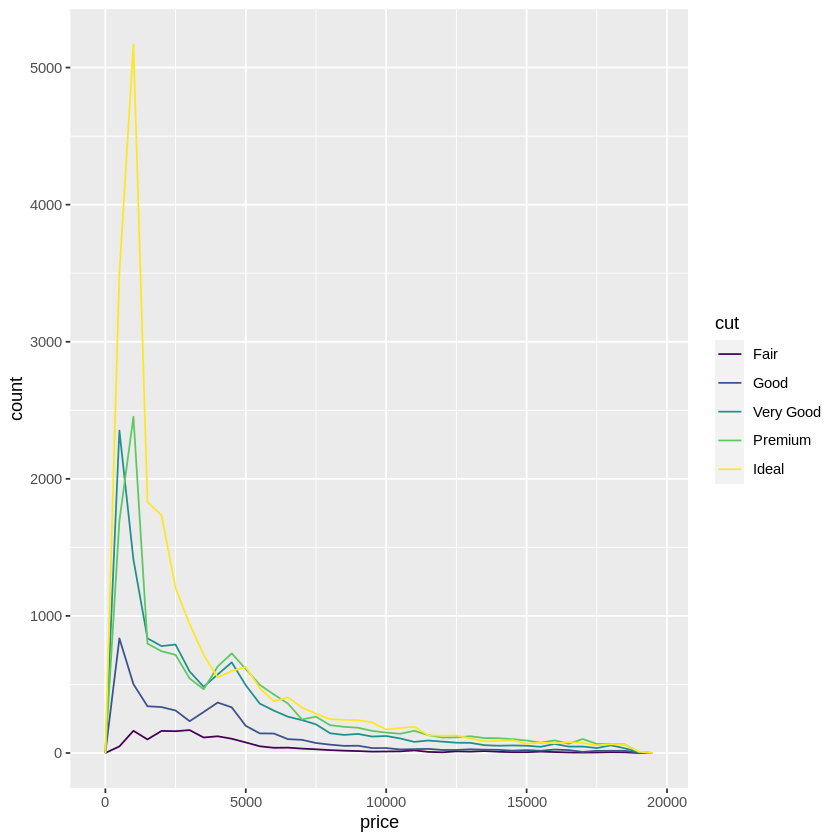

In [ ]:
# Let’s explore how the price of a diamond varies with its quality
ggplot(data = diamonds, mapping = aes(x = price)) +
  geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

# NB: It’s hard to see the difference in distribution because the overall
# counts differ so much

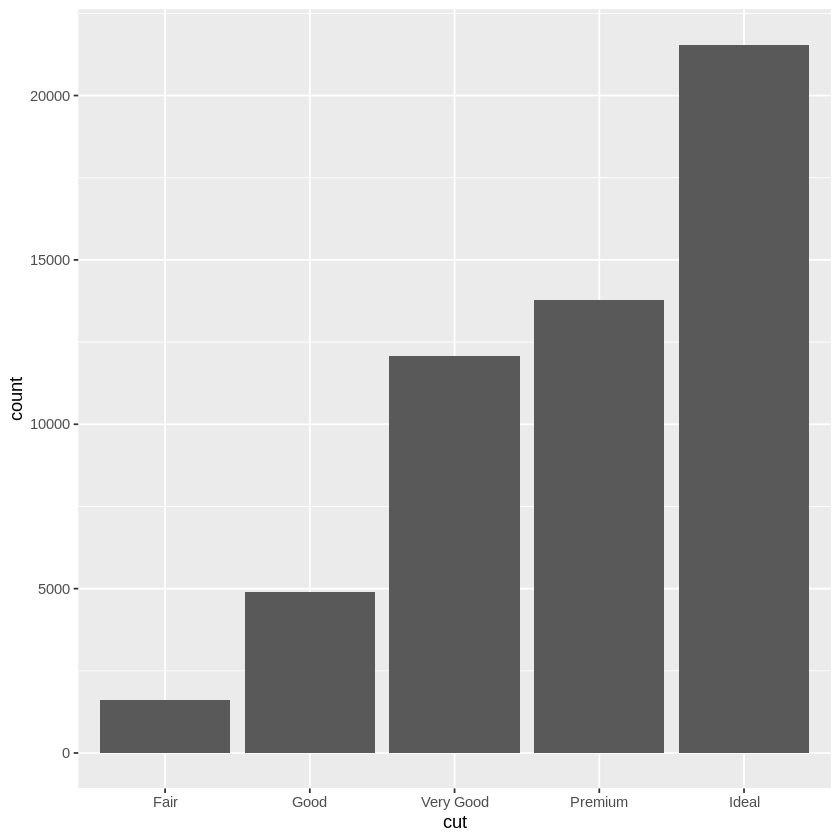

In [ ]:
ggplot(diamonds) +
  geom_bar(mapping = aes(x = cut))

To make the comparison easier we need to swap what is displayed<br/>
on the y-axis. Instead of displaying count, we’ll display density,<br/>
which is the count standardized so that the area under each frequency<br/>
polygon is one

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


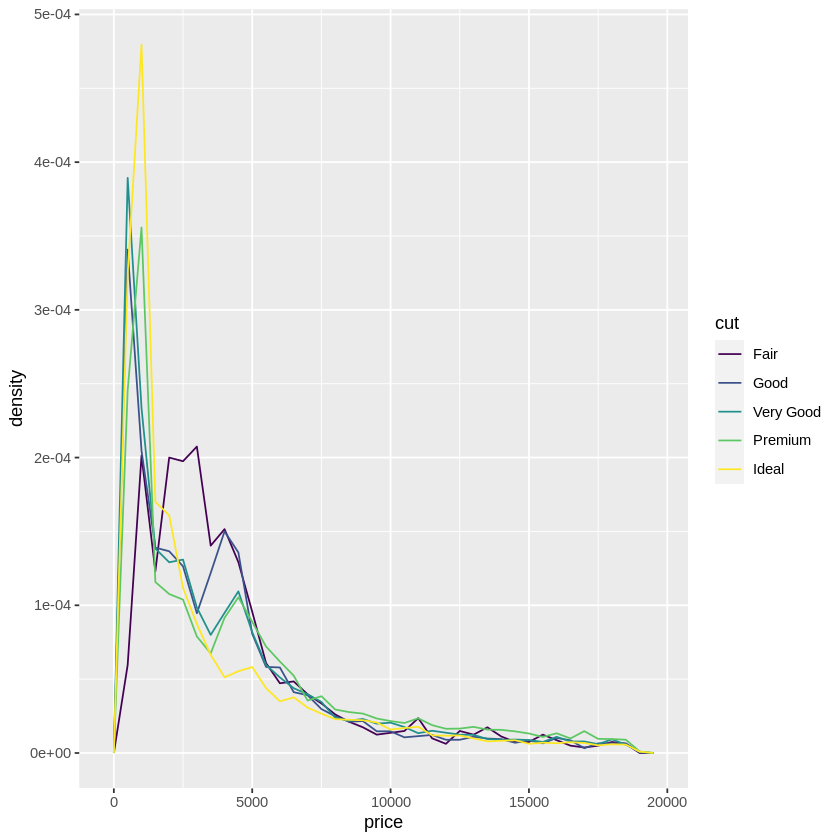

In [ ]:
ggplot(
  data = diamonds,
  mapping = aes(x = price, y = ..density..)
  ) +
  geom_freqpoly(mapping = aes(color = cut), binwidth = 500)


There’s something rather surprising about this plot—it appears that<br/>
fair diamonds (the lowest quality) have the highest average price!<br/>
But maybe that’s because frequency polygons are a little hard to<br/>
interpret—there’s a lot going on in this plot.

Another alternative to display the distribution of a continuous variable<br/>
broken down by a categorical variable is the **boxplot**.

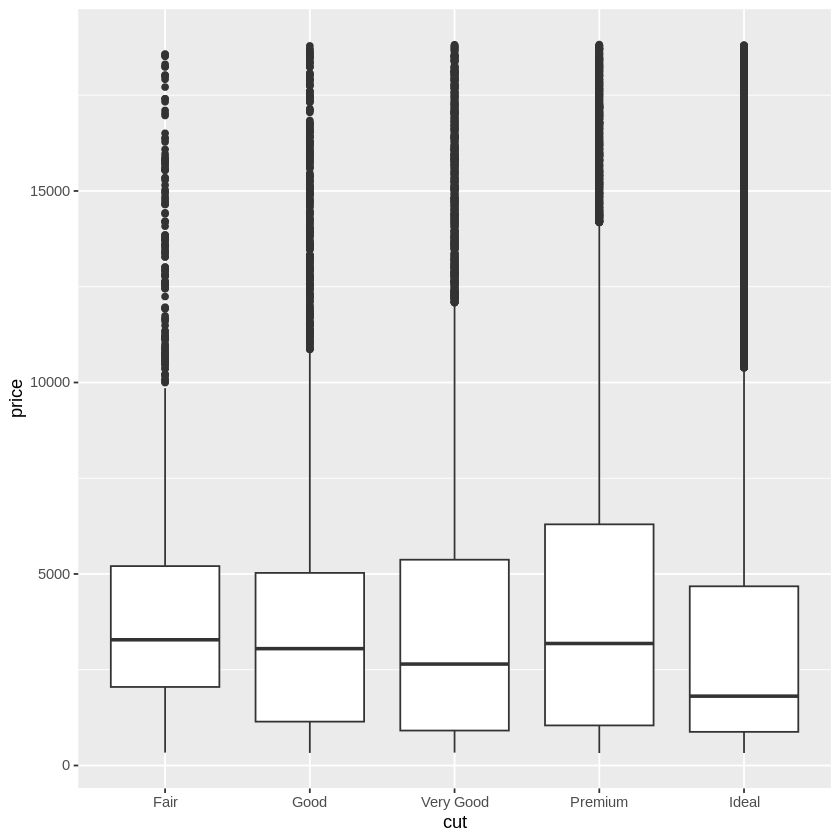

In [ ]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()

# NB:
# Counterintuitive finding:
# that better quality diamonds are cheaper on average!

We might also be interested to know how highway mileage varies across classes.<br/>
Let us take another example with the *mpg* dataset.

In [ ]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


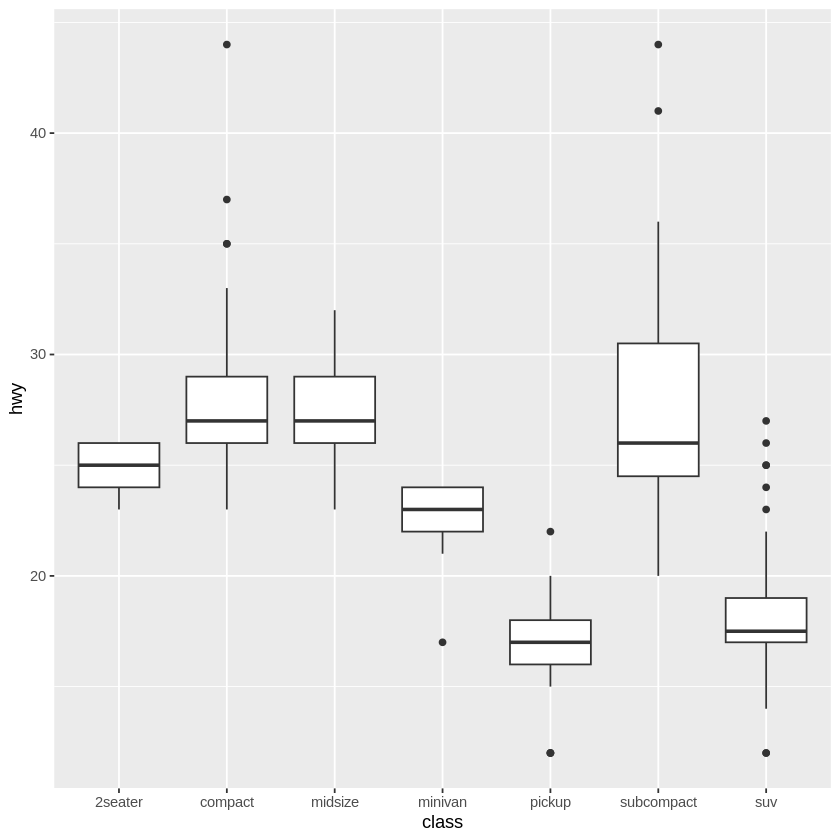

In [ ]:
# Let's visualize how highway mileage varies across classes
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot()

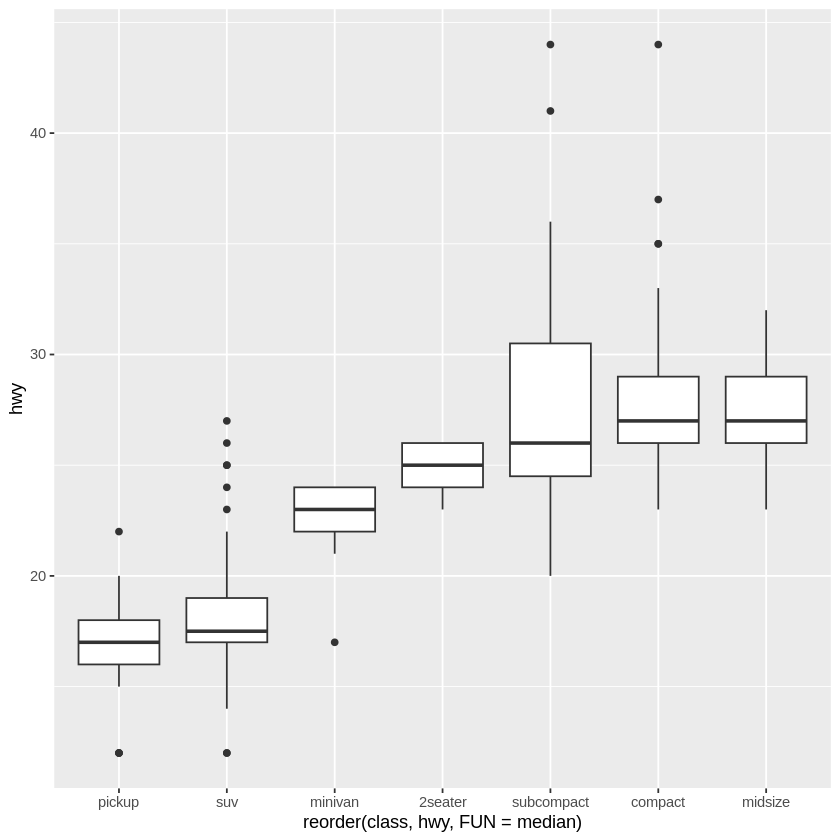

In [ ]:
# Let's improve the visualization by reordering the class
# based on the median value of hwy
ggplot(data = mpg) +
  geom_boxplot(
  mapping = aes(
    x = reorder(class, hwy, FUN = median),
    y = hwy
  )
)

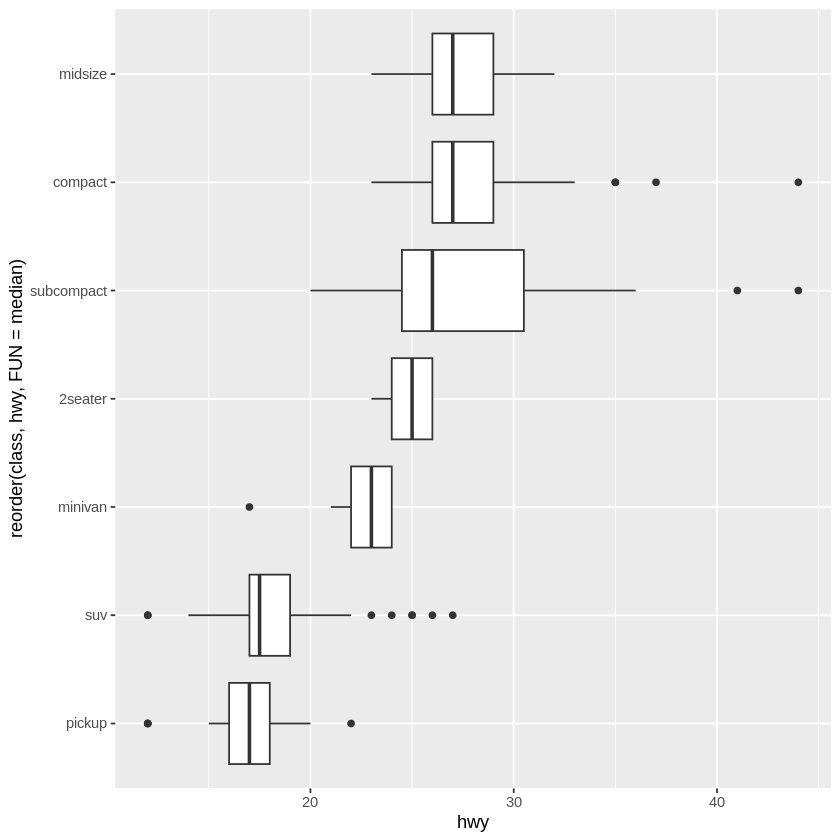

In [ ]:
# Finally, we can also flip the display
ggplot(data = mpg) +
  geom_boxplot(
  mapping = aes(
  x = reorder(class, hwy, FUN = median),
  y = hwy
  )
) +
coord_flip()

### Two categorical variables

We need to count the number of observations for each combination.

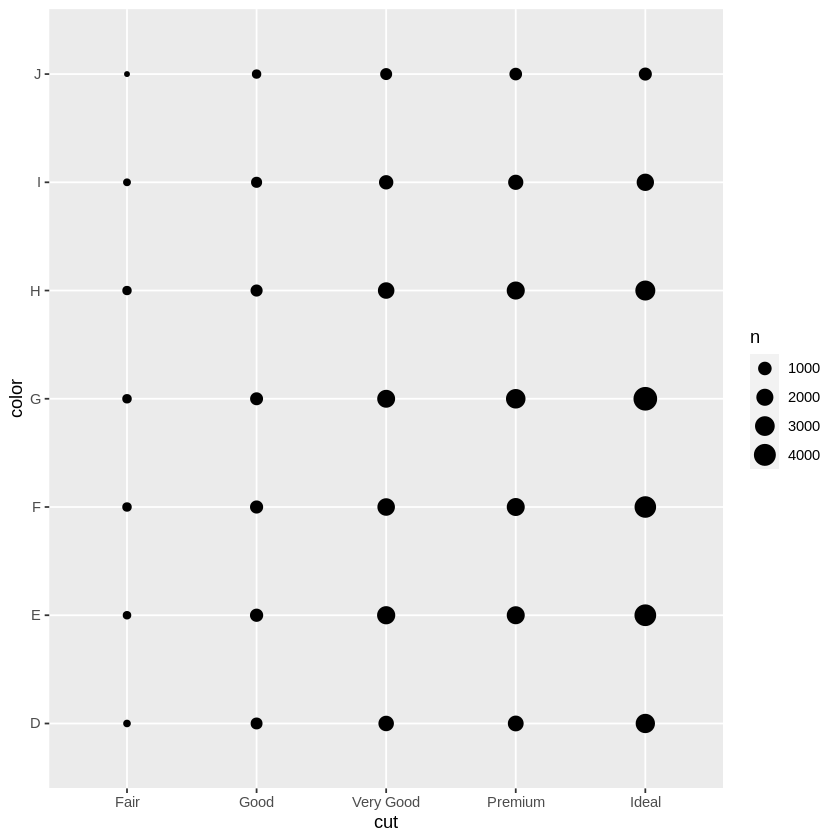

In [ ]:
ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color))

In [ ]:
diamonds %>%
  count(color, cut)

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337


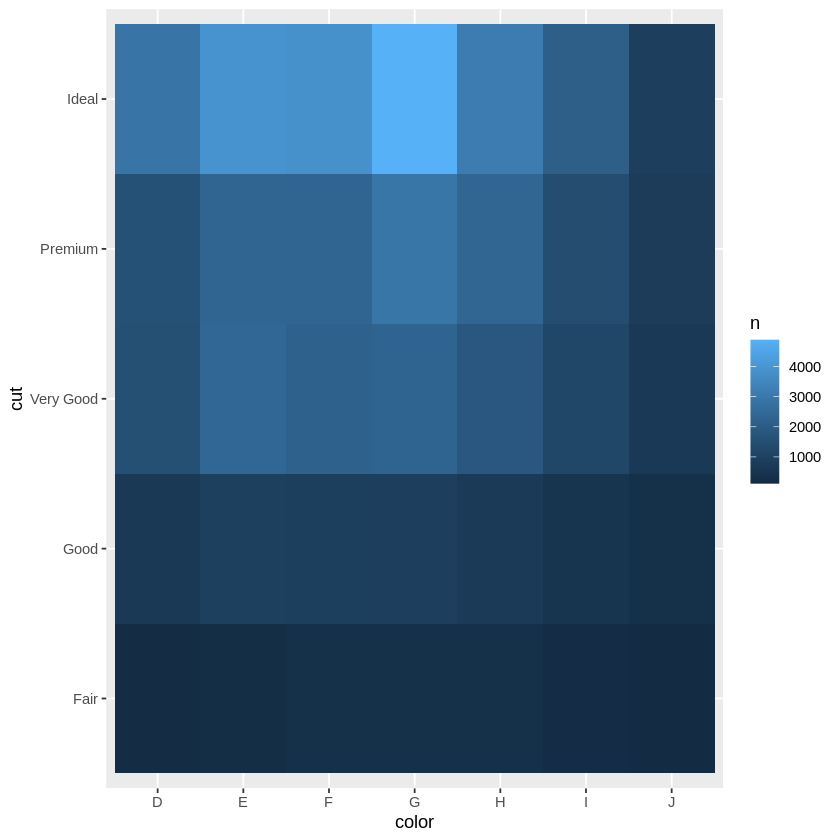

In [ ]:
# We can use a colored map to visualize the information
diamonds %>%
  count(color, cut) %>%
  ggplot(mapping = aes(x = color, y = cut)) +
  geom_tile(mapping = aes(fill = n))

### Two continuous variables

A great way to visualize the covariation between two continuous variables<br/>
is to draw a scatterplot with *geom_point()*.

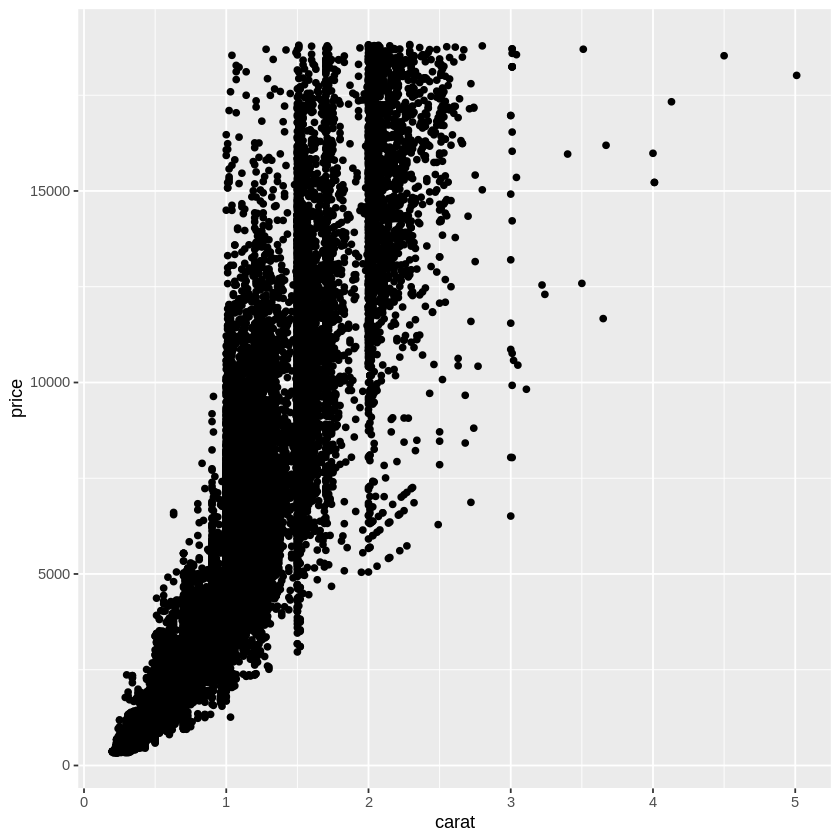

In [ ]:
# Let's see the relationship between carat size and price of diamond
ggplot(data = diamonds) +
  geom_point(mapping = aes(x = carat, y = price))

# NB: we can observe an exponential relationship

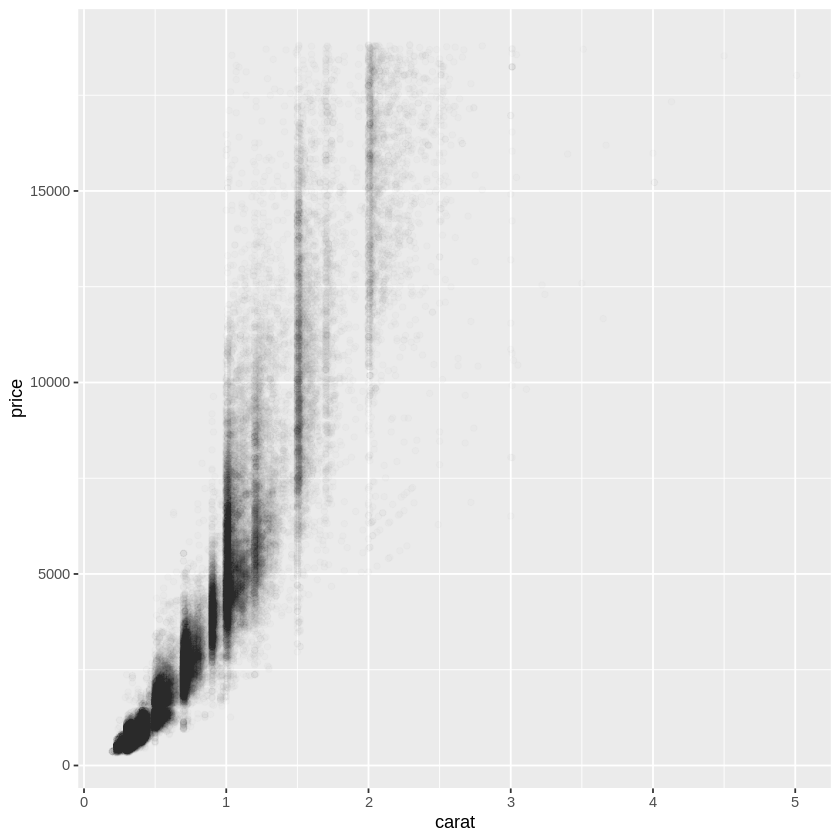

In [ ]:
# We can enhence the visualization by using the alpha aesthetic to add
# transparency and thus avoid the data points pile up into areas of uniform
# black.
ggplot(data = diamonds) +
  geom_point(
  mapping = aes(x = carat, y = price),
  alpha = 1 / 100
)

For very large datasets, this might not be sufficient...<br/>
Let's try another solution that uses bin. We will use **geom_bin2d()**<br/>
and **geom_hex()** to bin in two dimensions.<br/><br/>

**geom_bin2d()** and **geom_hex()** divide the coordinate plane into 2D<br/>
bins and then use a fill color to display how many points fall into<br/>
each bin. **geom_bin2d()** creates rectangular bins. **geom_hex()** creates<br/>
hexagonal bins. You will need to install the hexbin package to use<br/>
**geom_hex()**!

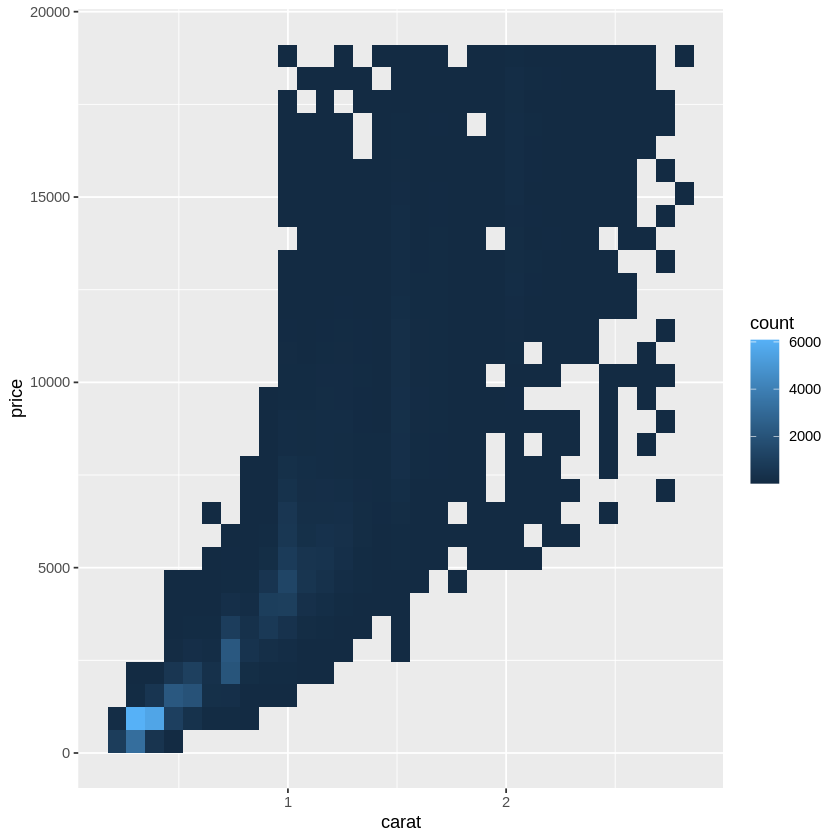

In [ ]:
ggplot(data = smaller) +
  geom_bin2d(mapping = aes(x = carat, y = price))

In [ ]:
install.packages("hexbin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



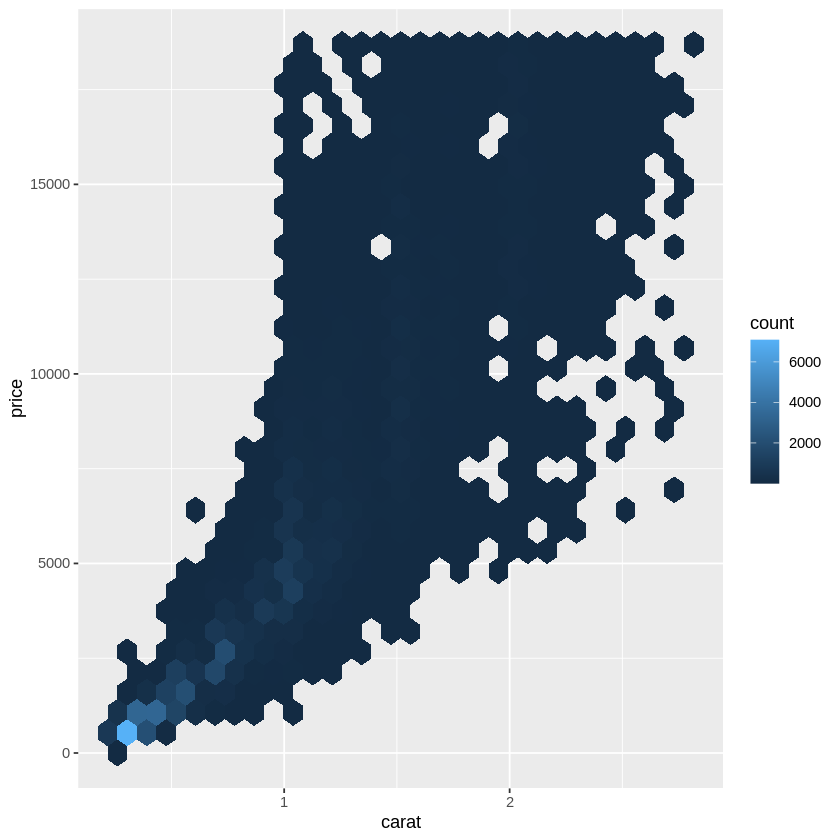

In [ ]:
ggplot(data = smaller) +
  geom_hex(mapping = aes(x = carat, y = price))

Another option is to bin one continuous variable so it acts like a<br/>
categorical variable. Then you can use one of the techniques for<br/>
visualizing the combination of a categorical and a continuous<br/>
variable that you learned about.

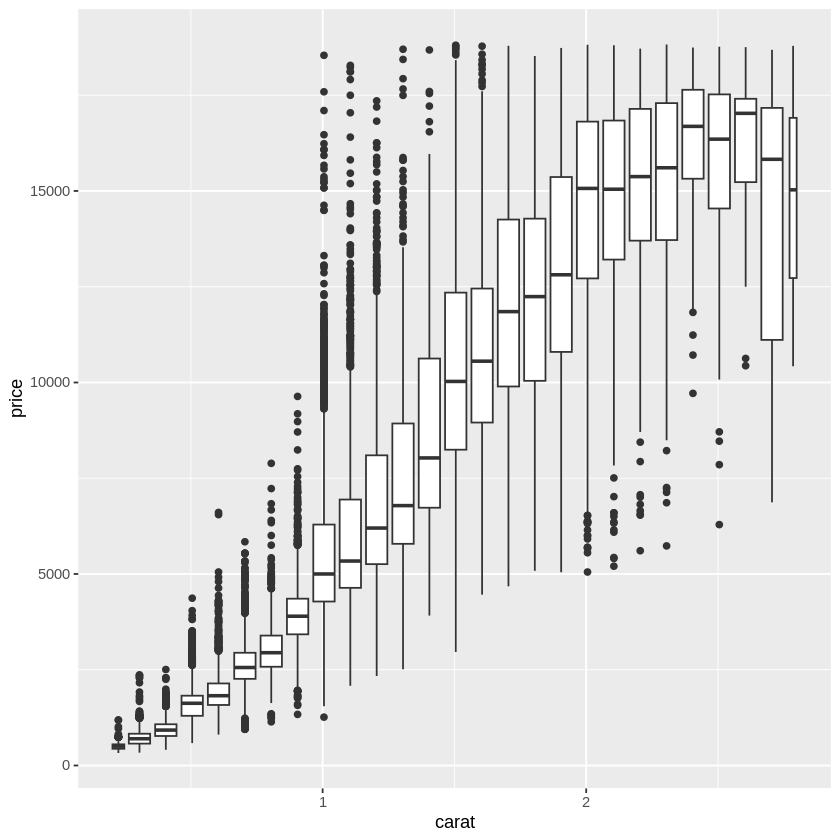

In [ ]:
# Let's bin carat and then for each group, display a boxplot
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))

**cut_width(x, width)**, as used here, divides x into bins of width **width**.<br/><br/>

By default, boxplots look roughly the same (apart from the number of <br/>
outliers) regardless of how many observations there are, so it’s difficult<br/>
to tell that each boxplot summarizes a different number of points.<br/><br/>

One way to show that is to make the width of the boxplot<br/>
proportional to the number of points with varwidth = TRUE.

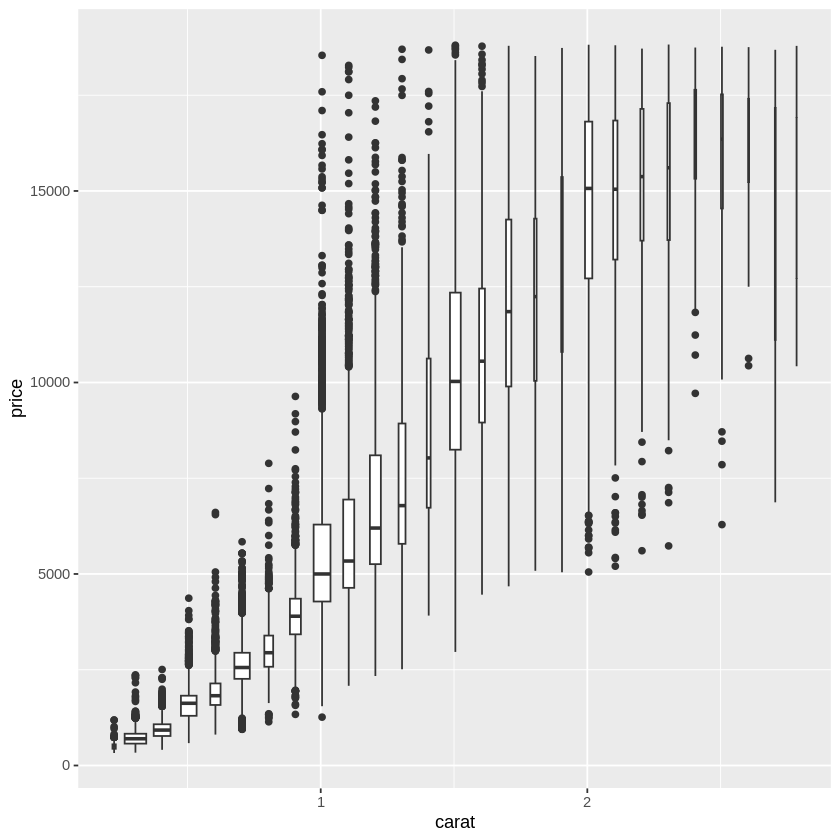

In [ ]:
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)), varwidth = TRUE)

Another approach is to display approximately the same number of<br/>
points in each bin.

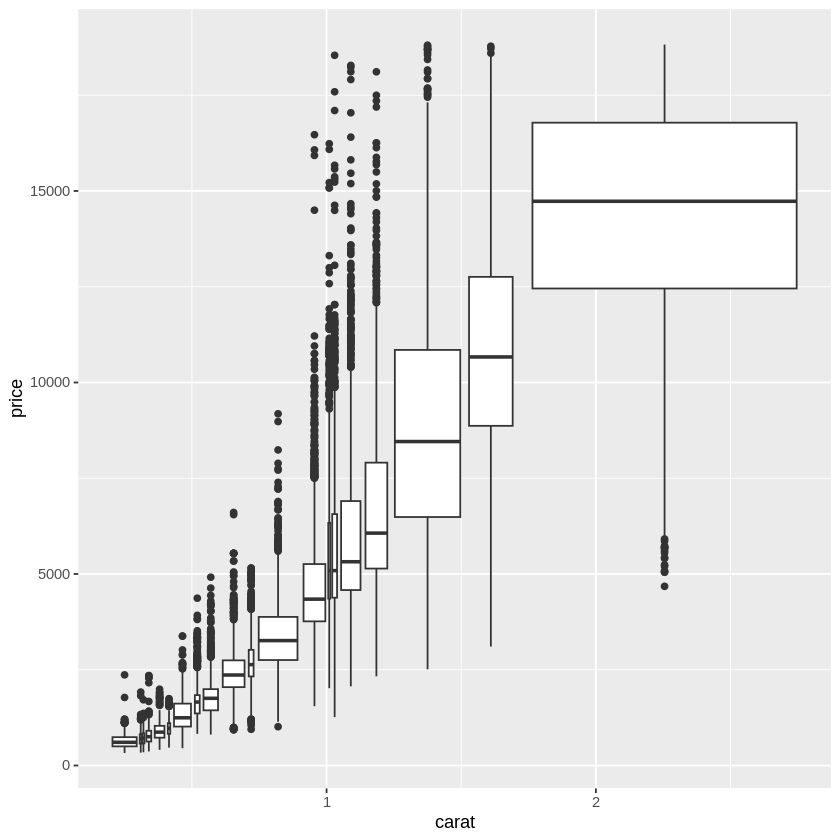

In [ ]:
# Let's use cut_number()
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
  geom_boxplot(mapping = aes(group = cut_number(carat, 20)))